## Student: Rodolfo Lerma

# Introduction to Markov Decision Processes

## Machine Learning 530
### Stephen Elston

In this lesson we will introduce **Markov processes**, which are a **representation** of a **memoryless state transition processes**. The diagram below shows the Markov process representation in the intelligent agent, along with the interactions with the environment.   

<img src="img/AgentEnvironment.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Interaction of agent and environment** </center>

**Markov decision processes** which are widely used in planning and optimal decision theory. The closely related **Markov reward process** is necessary for planning and optimal decision methods. We will introduce the Markov reward process here. Markov decision processes are addressed in another lesson. 

Suggested readings: The following reading is a supplement to the material presented here:

Sutton and Barto, second edition, Sections 3.1, 3.2, 3.3, 3.4, 3.5 or
Russell and Norvig, third edition, Section 7.1, or
Kochenderfer, Section 4.1.

## Markov Processes

A first order **Markov process** is a process where the probability of a transition between a **finite set of states** only depends on the current state. In other words, first order **Markov processes have no memory of past states**. The current state has all the relevant information on the history of states.   

For the transition between as a state $S_t$, at time $t$ ,to the next state $S'_{t+1}$, at time $t+1$, we can express a Markov process mathematically as follows:

$$p[S'_{t+1}\ |\ S_1, \ldots, S_t] = p[S'_{t+1}\ |\ S_t]$$

For a vector of possible states, $S$, we can create a **state transition probability matrix**. This matrix **represents** the probability of a state transition from $S$ to the next state, $S'$ at the next time step:

$$\mathcal{P_{ss'}} = 
\begin{bmatrix}
    p_{11} & p_{12} & \dots  & p_{1n} \\
    p_{21} & p_{22} & \dots  & p_{2n} \\
    \vdots & \vdots & \ddots  & \vdots \\
    p_{n1} & p_{n2} & \dots  & p_{nn}
\end{bmatrix}
$$
Where, $\mathcal{p}_{ij} =$ probability of transition from state $s_j$ to $s'_i$.   

Let's say we have a vector of probabilities of being in one of n possible states, $\mathcal{S} = (s_1, s_2, \ldots, s_n)$. Using simple matrix multiplication we can write the relationships for the transition to the next state $\mathcal{S'}$ as:

$$S' = \mathcal{P_{ss'}} S\\
or\\
\begin{bmatrix}
    s_1' \\
    s_2' \\
    \vdots \\
    s_n'
\end{bmatrix}
=
\begin{bmatrix}
     p_{11} & p_{12} & \dots  & p_{1n} \\
    p_{21} & p_{22} & \dots  & p_{2n} \\
    \vdots & \vdots & \ddots  & \vdots \\
    p_{n1} & p_{n2} & \dots  & p_{nn}
\end{bmatrix}
\begin{bmatrix}
    s_1 \\
    s_2 \\
    \vdots \\
    s_n
\end{bmatrix}
\\
$$


A **Markov chain** is a sequence of of states of a Markov process. In other words, if we run a Markov process over a number of time steps the result is a Markov chain. 

If the transition probability matrix, $ \mathcal{P_{ss'}}$, does not change over time, we say the Markov chain is **stationary**. Stationary Markov chains have a **convergence property**. If we run the Markov chain for enough time steps, the chain will reach a **steady state**. At steady state the probabilities of being in any state of the Markov process is **unchanged from time step to time step**. 


## Computational Example - Does Steve Need a New Car?

Let's try a computational example to test out the foregoing concepts. In this case we will look at the state transitions for the use of an old car vs. a new car. The diagram below shows the states of car ownership and the possible transitions between them.   

<img src="img/CarStates.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> States and possible transitions of car use </center>

The states and the possible transitions are:
1. Old car, can transition to continue driving the old car, a breakdown, or an accident.
2. Old car breakdown, can transition to old car or new car.
3. Old car accident, transitions to new car.
4. New car, can transition to continue driving the new car, a breakdown, or an accident.
5. New car breakdown, transitions to new car or to an old car.
6. New car accident, transitions to new car.

Notice that there are no **terminal states** in this diagram. A terminal state can be entered, but there is no possible transition to another state. An example of a terminal state is the win or loss of a game. The game is over, and there will be no more state transitions. Markov processes with terminal states are said to be **episodic** or **finite** since they run for a finite period of time, after which they must be restarted. Whereas, Markov processes with no terminal state are said to be **infinite**, since in theory they will run for an infinite number of time steps.




> **Exercise 8-1-1:** Given these transitions, the question is what is the probability that Steve will end up in a new car or keep his old car. You will start by defining a transition probability matrix and testing that the probabilities in the columns add to 1.0. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log
%matplotlib inline

## Define the transition probability matrix below
T = np.array([[9.8998e-01, 9.80000e-01, 0.00000e-00, 1.00000e-01, 0.00000e+00],
 [1.00000e-02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
 [0.00001e+00,2.00000e-02, 9.98999e-01, 9.00000e-01, 1.00000e+00],
 [0.00000e+00, 0.00000e+00, 1.00000e-03, 0.00000e+00, 0.00000e+00],
 [0.00001e+00, 0.00000e+00, 1.00000e-06, 0.00000e+00, 0.00000e+00]])

print('The transition probability matrix')
labels = ['OldCar','OldBreak','NewCar','NewBreak','Accident']
print(pd.DataFrame(T, columns = labels, index = labels))

print('\nTest that the columns add to 1')
np.sum(T, axis = 0)

The transition probability matrix
           OldCar  OldBreak    NewCar  NewBreak  Accident
OldCar    0.98998      0.98  0.000000       0.1       0.0
OldBreak  0.01000      0.00  0.000000       0.0       0.0
NewCar    0.00001      0.02  0.998999       0.9       1.0
NewBreak  0.00000      0.00  0.001000       0.0       0.0
Accident  0.00001      0.00  0.000001       0.0       0.0

Test that the columns add to 1


array([1., 1., 1., 1., 1.])

> Now you will do the following to execute a single state transition:   
> 1. Define a state vector with the starting state of `OldCar`. In other words, the initial probability is $P(OldCar) = 1.0$.
> 2. Compute and print the updated state, $s'$, using [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).

In [2]:
## Your code goes below
initial_state = np.array([1.0,0.0, 0.0, 0.0, 0.0 ])
sprime = pd.Series(np.dot(T,initial_state), index = labels)
print(sprime)

OldCar      0.98998
OldBreak    0.01000
NewCar      0.00001
NewBreak    0.00000
Accident    0.00001
dtype: float64


> **Question 1:** Notice there are some zero and non-zero state probabilities. Given the state transition matrix, are these zero and non-zero values expected and why?  

> **Answer**  
Given the transition matrix for this particular problem it is expected that we will get some zero and non-zero state probabilities, this as the Markov Process has no memory and in this current state for instance it is no possible to get a new break down since that requires a new car which leads to a zero state probability.

> Next complete the line of code in the cell below and execute the code. 

In [3]:
def state_transition(T, s, n = 1):
    s_list = np.reshape(s, (s.shape[0],1))
    for _ in range(n):
        ## Complete the line of code below
        s = np.dot(T,s)
        s_list = np.concatenate((s_list, np.reshape(s, (s.shape[0],1))), axis = 1)
    return s_list

states = state_transition(T, initial_state, 50000)

In [4]:
pd.Series(states[:,40000], index = labels)

OldCar      0.311314
OldBreak    0.003113
NewCar      0.684884
NewBreak    0.000685
Accident    0.000004
dtype: float64

> You can see the probabilities of being in each state after a large number of transitions.
> Now, execute the code in the cell below to make a plot of these states. 

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


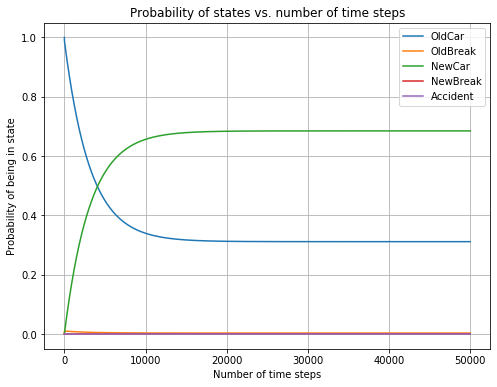

In [5]:
def plot_states(states, labels):
    fig = plt.figure(figsize=(8,6)) # define plot area
    ax = fig.gca() # define axis 
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('Probability of being in state')
    ax.set_title('Probability of states vs. number of time steps')
    ax.grid()
    for i in range(states.shape[0]):
        plt.plot(states[i,:])
    ax.legend(labels)    
        
plot_states(states, labels)        

> Answer the following questions with short answers:       
> 2. Do these state probabilities appear to have reached a **steady state** and why?   
> 3. What do the final probabilities tell you about the chances of driving and old car vs. a new car.    

> **Answers:**      
> 2. Yes, these state probabilities appear to be in a steady state since the curves are flat, not changing. After around 15,000 time steps the probabilities remain unchanged.      
> 3. Over time is more likely that Steve will be driving a new car than keeping his old car. Based on the curve above I would say it is twice more likely.  

## Markov Reward Process

We can define a **reward function**, $\mathcal{R}$ as the **expected reward** of **change in utility** in the next time step. Given the expectation over all transitions from the current state $s$ to all possible **successor states** $s'$:

$$R_{t+1} = E \big[ \mathcal{R}_{s s'}\ |\ S_t = s \big]$$   

Where, $\mathcal{R}_{s s'}$ is the reward for the transition from state, $s$ to a successor state, $s'$. 

Let's look at an example of a Markov reward process. The diagram below shows the rewards for the various state transitions in the auto example. Since owning cars has significant costs, all of the rewards are negative. 

<img src="img/CarRewards.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Rewards for state transitions of car use** </center>

Keep in mind that just like utility, **reward need not simply follow monetary value**. For example, the reward of the car breaking down must account for the inconvenience of dealing with the repair, or the reward for driving the car must account for intangibles like comfort and safety of the passengers.  

What is the relationship between gain and reward in a Markov chain? It is easy to compute gain from rewards, since **rewards are additive**. First, let's consider the gain, $G$, for finite Markov reward process, which reaches a terminal state after $T$ time steps:

$$G([s_o, s_1, \ldots, s_T]) = R(s_o) + R(s_1) + \ldots + R(s_T) = \sum_{t = 0}^T R(s_t)$$

Where, the expected rewards, $\mathcal{R}(s')$, for the transition from state $s$, to the next state, $s'$, given the transition reward matrix, $\mathcal{R}_{s s'}$, and the transition probability matrix $\mathcal{P}_{ss'}$:   

$$\mathcal{R}(s') = E \big[ \mathcal{R}_{s s'}\ |\ S_t = s \big]$$  
$$Reward(s') = Probability\ of\ transition\ from\ s\ to\ s' * Rewards_{ss'}$$


But, consider what happens with an infinite Markov reward process, which never reaches a terminal state. If we use the above formulation, the utility will grow without bound; e.g. $U(s_t) \rightarrow \infty$ as $T \rightarrow \infty$. 

The solution to keeping gain bounded for infinite Markov reward processes is **discounting**. By discounting we are saying that the value of a reward in the future decreases the further in the future the reward is received. This is a commonly used concept in many fields. For example, an investor will discount expected future returns, preferring immediate payoff. 

Using discounting, we can formulate a bounded relationship between gain and reward:

$$G([s_o, s_1, s_2, s_3 \ldots]) = R(s_o) + \gamma R(s_1) + \gamma^2 R(s_2) + \gamma^3 R(s_3) \ldots = \sum_{t = 0}^{\infty} \gamma^{t} R(s_t)$$

The choice of the discount parameter, $\gamma$, will change the outcome for the Markov reward process:
- As $\gamma \rightarrow 0$, the reward process becomes myopic, only counting near term rewards.
- As $\gamma \rightarrow 1$, the reward process becomes far sighted, valuing distant rewards highly. 

For infinite Markov reward processes we are interested in the **return** for state transitions starting with the current state. Return is the sum of the rewards for future state transitions and can be expressed as:

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} \ldots = \sum_{k = 0}^{\infty} \gamma^{k} R_{t+k+1}$$

We are also interested in the **state value function**. This expression computes the expected future value of being in state $s$:

$$v(s) = E[G_t\ |\ S_t = s ]$$

## Optimal Policy

The agent uses a **policy**, $\pi$, to determine which action to take. The expected **action value** given the action, $a$, from state, $s$, by the policy, $\pi$, is:   

$$q_{\pi}(s,a) = \mathbb{E}_{\pi} [G_{t}\ |\ S_t = s, A_t = a] $$

Our goal is to find an **optimal policy**, $\pi^*$, which maximizes the expected action value. We say that the optimal policy gives the highest expected action value, , $q_*(s,a)$,, for the action $a$, from state $s$:

$$q_{\pi^*}(s,a) = \mathbb{E}_{\pi^*} [G_{t}\ |\ S_t = s, A_t = a] $$

An optimal policy has an expected action value greater than or equal to all possible policies:

$$q_{\pi^*}(s,a) \ge q_{\pi}(s,a)\ \forall\ \pi$$

## Computational Example

> **Exercise 8-1-2:** With the above theory in mind, you will now try a computational example for a Markov reward process. The convergence properties of the state value function are of particular interest. This convergence is key to finding an optimal policy for a Markov reward process.     
> As a first step you, must define a matrix of the rewards for transitions between the states. Fill in the missing code below using the transition rewards shown in the diagram above. Then execute the cell.

In [6]:
## Fill in the array belo to define the Markov reward matrix
R = np.array([[-30.0, -600, 0.0, -3000, 0.0],
 [-200.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, -30000, -50, -100, -30000],
 [0.0, 0.0, -1000, 0.0, 0.0],
 [-100000, 0.0, -50000, 0.0, 0.0]])

print('The reward matrix for state transitions')
labels = ['OldCar','OldBreak','NewCar','NewBreak','Accident']
print(pd.DataFrame(R, columns = labels, index = labels))

The reward matrix for state transitions
            OldCar  OldBreak   NewCar  NewBreak  Accident
OldCar       -30.0    -600.0      0.0   -3000.0       0.0
OldBreak    -200.0       0.0      0.0       0.0       0.0
NewCar         0.0  -30000.0    -50.0    -100.0  -30000.0
NewBreak       0.0       0.0  -1000.0       0.0       0.0
Accident -100000.0       0.0 -50000.0       0.0       0.0


> In the cell below, complete the code to perform the following operations:      
> 1. Compute the reward, as the dot product between the reward matrix and the difference between the current state and the last state.    
> 2. Save the current stat to the `last_state` variable.  
> 3. Apply the state transition matrix to update the current state.  
> Execute your completed code.

In [7]:
def compute_gain(T, R, s, n = 1, gamma = 0.9):
    gain_list = np.reshape(np.zeros(s.shape), (1,s.shape[0]))
    state = s
    last_state = s
    for _ in range(n):
        ## Complete the code below
        delta_s = np.subtract(last_state, state)
        reward = np.dot(R, delta_s)
        last_state = state
        state = np.dot(T,state)
        
        ## Add the updated reward to the discounted sum of rewards to upate the gain 
        reward = reward + gamma * gain_list[-1,:]
        gain_list = np.concatenate((gain_list, np.reshape(reward, (1,s.shape[0]))), axis = 0)        
    return np.delete(gain_list, 0, 0) 

In [8]:
gains = compute_gain(T, R, initial_state, n = 100)   

> Next, execute the code in the cell below to display the gain function values.  

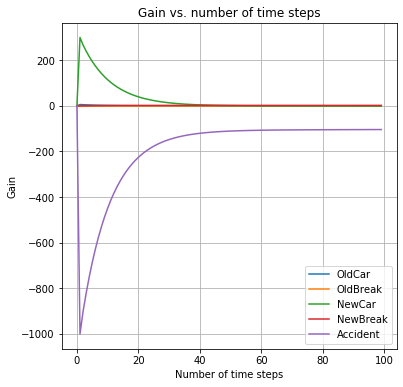

In [9]:
def plot_gain(gain, labels):
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis 
    ax.grid()
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('Gain')
    ax.set_title('Gain vs. number of time steps')
    for i in range(gain.shape[1]):
        plt.plot(gain[:,i])
    ax.legend(labels)    
    
plot_gain(gains, labels)    

Value of State

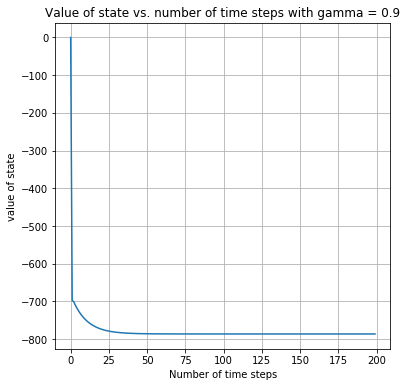

In [10]:
def compute_state_value(T, R, s, n = 1, gamma = 0.9):
    value_list = []
    for _ in range(n):
        s_prime = np.matmul(T,s) 
        delta_s = np.subtract(s,s_prime)
        s = s_prime
        v_list.append(np.sum(np.matmul(R,delta_s))) 
    
    state_value = 0.0
    for i in range(n):
        state_value = state_value + gamma**i * v_list[i]
    return state_value

def converge_state_value(T, R, s, n = 1, gamma = 0.9):
    return [compute_state_value(T, R, s, steps, gamma) for steps in range(n)]

gamma = 0.9
values = converge_state_value(T, R, initial_state, n = 200, gamma = gamma)

def plot_values(vals, gamma):
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.gca() 
    ax.grid()
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('value of state')
    ax.set_title('Value of state vs. number of time steps with gamma = ' + str(gamma))
    plt.plot(vals)
        
plot_values(values, gamma)        

> **Question 1.** Have these gain functions reached a steady and state and why?    

> **Answer:** 
Yes they have and that was expected since as mentioned before Markov chains will reach a steady state after enough steps. At this steady state condition the probabilities of being at any state remain constant. In this case having a `discount parameter` $\gamma=0.9$ get us to stability at around 40 number of time steps for most of the gain functions represented.

> Execute the code in the cell below to compute and display the gain function for a discounting constant, $\gamma=0.99$. 

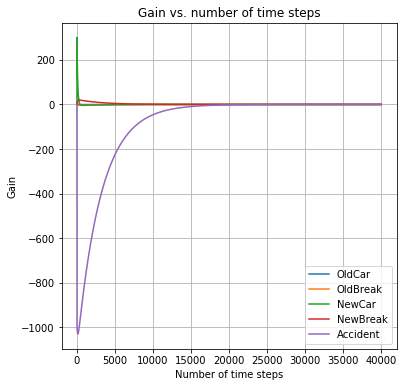

In [11]:
gain = compute_gain(T, R, initial_state, n = 40000, gamma=0.99)  
plot_gain(gain, labels)   

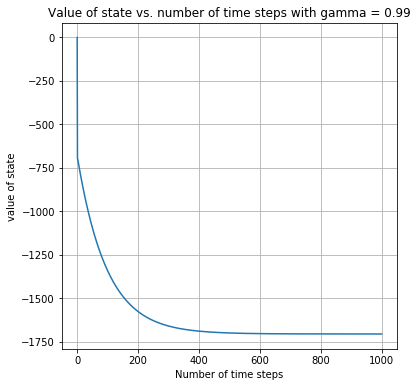

In [12]:
gamma = 0.99
values = converge_state_value(T, R, initial_state, n = 1000, gamma = gamma)
plot_values(values, gamma)        

> **Question 2:** Compare the gain curves for $\gamma=0.9$ and $\gamma=0.99$. Describe the difference in convergence to steady state for both discount constants.   

> **Answer:** 
As expected the gain curves with a `discount parameter` $\gamma$ closer to 1 ($\gamma=0.99$), takes longer to converge compared to the other value ($\gamma=0.9$) as the reward process becomes *far sighted* and consider distant rewards highly.

#### Copyright 2018, 2019, 2022, Stephen F Elston. All rights reserved. 